In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Read Data

In [2]:
path_to_processed_df = "../data/processed/P01"

#Get list of csv files
data_paths = os.listdir(path_to_processed_df)

# Keep only csv data
data_paths = [x for x in data_paths if x.endswith(".csv")]
data_paths = [os.path.join(path_to_processed_df, x) for x in data_paths]
data_paths.sort()

In [3]:
def load_data_as_dataframe(data_paths: list[str]) -> list[pd.DataFrame]:
    """ Loads the .csv file into dataframes

    :return: list[pd.DataFrames]
    """
    data = []
    for path in data_paths:
        df = pd.read_csv(path)
        # Convert 'TS_UNIX' to datetime
        df["TS_UNIX"] = pd.to_datetime(df["TS_UNIX"], format="%Y-%m-%d %H:%M:%S.%f")
        df = df.set_index("TS_UNIX", drop=True)
        data.append(df)

    return data

df_list = load_data_as_dataframe(data_paths)

# Processing

In [4]:
df_list[0]

,EEG-L3-RW250,EEG-L5-RW250,EEG-C3-RW250,EEG-Cz-RW250,EEG-C4-RW250,EEG-R3-RW250,EEG-R5-RW250
TS_UNIX,,,,,,,
2022-06-20 16:52:00.482892032+02:00,2.627422,1.855009,4.020922,1.478189,4.339555,1.561284,3.142269
2022-06-20 16:52:00.482905088+02:00,2.444575,1.693927,3.758652,1.222329,3.966451,1.328616,2.830244
2022-06-20 16:52:00.482917888+02:00,2.270200,1.542644,3.514562,1.027031,3.598714,1.113825,2.546634
2022-06-20 16:52:00.482929920+02:00,2.121425,1.408440,3.302235,0.889588,3.246621,0.916807,2.312470
2022-06-20 16:52:00.482949888+02:00,2.007978,1.297264,3.125684,0.797827,2.916363,0.738571,2.134958
...,...,...,...,...,...,...,...
2022-06-20 16:53:27.914141952+02:00,0.532971,0.538213,0.037965,0.951213,-0.198071,0.973324,-0.842514
2022-06-20 16:53:27.914152960+02:00,0.548611,0.574675,0.023627,0.939592,-0.234455,0.972067,-0.744485
2022-06-20 16:53:27.914163968+02:00,0.564981,0.606522,-0.000629,0.910126,-0.286229,0.969688,-0.639527


In [5]:
df_scaled_list = []

for df in df_list:
    scaler = StandardScaler(with_mean=False)
    df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
    df_scaled_list.append(df_scaled)

In [6]:
df_scaled_list[0].describe()

,EEG-L3-RW250,EEG-L5-RW250,EEG-C3-RW250,EEG-Cz-RW250,EEG-C4-RW250,EEG-R3-RW250,EEG-R5-RW250
count,10990.000000,10990.000000,10990.000000,10990.000000,10990.000000,10990.000000,10990.000000
mean,0.002070,0.003593,0.008737,-0.000742,0.003763,-0.000264,-0.000549
std,1.000045,1.000045,1.000045,1.000045,1.000045,1.000045,1.000045
min,-6.733986,-5.384290,-5.160308,-5.176663,-4.623664,-5.265560,-5.350598
25%,-0.207866,-0.208779,-0.345628,-0.307549,-0.326265,-0.256060,-0.371276
50%,0.040422,0.079535,0.026657,0.063418,0.015057,0.068801,0.076913
75%,0.330566,0.352189,0.374333,0.432648,0.414848,0.372483,0.465156
max,6.767916,4.090704,4.434177,4.059793,4.254504,3.884361,3.947903


## Reshape to LSTM format

In [7]:
sequence_length = df_scaled_list[0].shape[0]

# Convert DataFrames to numpy arrays and reshape them
reshaped_data = []
for df in df_scaled_list:
    # Convert DataFrame to numpy array
    data_array = df.values  # Assuming your DataFrame is named 'df'

    # Calculate the number of sequences that can be extracted
    num_sequences = len(data_array) - sequence_length + 1

    # Extract sequences of length 'sequence_length'
    for i in range(num_sequences):
        sequence = data_array[i:i + sequence_length]
        reshaped_data.append(sequence)

# Convert reshaped_data to a numpy array
reshaped_data = np.array(reshaped_data)

# Check the shape of the reshaped data
print(reshaped_data.shape)

(10, 10990, 7)


# Modelling

In [8]:
import tensorflow as tf

from tensorflow.keras.layers import Input, LSTM, RepeatVector, Dense, Bidirectional


# Hyperparams
sequence_length = df_scaled_list[0].shape[0]
latent_dims = 2
num_features = df_scaled_list[0].shape[1]

# Sampling layer
class Sampling(tf.keras.layers.Layer):
    def call(self, args):
        z_mean, z_log_var = args
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Encoder Architecture
inputs = Input(shape=(sequence_length, num_features))
z = LSTM(128, return_sequences=True)(inputs)
z = LSTM(latent_dims)(z)
z_mean = Dense(latent_dims)(z)
z_log_var = Dense(latent_dims)(z)
codings = Sampling()([z_mean, z_log_var])
encoder = tf.keras.Model(inputs=[inputs], outputs = [z_mean, z_log_var, codings])

# Decoder Architecture
decoder_inputs = Input(shape=(latent_dims,))
x = RepeatVector(sequence_length)(decoder_inputs)
x = LSTM(128, return_sequences=True)(x)
x = LSTM(num_features, return_sequences=True)(x)
decoder = tf.keras.Model(inputs=decoder_inputs, outputs=x)

# Connecting Encoder + Decoder
_, _, codings = encoder(inputs)
reconstructions = decoder(codings)
vae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions])

# Latent Loss
latent_loss = -0.5 * tf.keras.backend.sum(
                1 + z_mean - tf.keras.backend.exp(z_log_var) - tf.keras.backend.square(z_mean),
            axis=-1)
vae.add_loss(tf.keras.backend.mean(latent_loss) / sequence_length)

# Compile VAE
vae.compile(loss="mse", optimizer="adam")

2023-12-05 17:13:52.589242: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
vae.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 10990, 7)]           0         []                            
                                                                                                  
 model (Functional)          [(None, 2),                  70692     ['input_1[0][0]']             
                              (None, 2),                                                          
                              (None, 2)]                                                          
                                                                                                  
 model_1 (Functional)        (None, 10990, 7)             70880     ['model[0][2]']               
                                                                                            

In [10]:
history = vae.fit(reshaped_data, reshaped_data, epochs=2, batch_size=1)

Epoch 1/2
10/10 [==============================] - 378s 37s/step - loss: 1.0026
Epoch 2/2
10/10 [==============================] - 390s 39s/step - loss: 1.0032


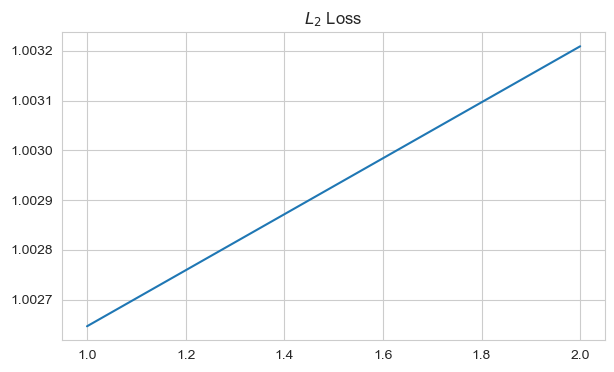

In [11]:
def plot_history(history):
    loss_dict = history.history

    y = loss_dict["loss"]
    x = [i+1 for i in range(0, len(y))]

    plt.figure(figsize=(7, 4))
    plt.title("$L_2$ Loss")
    sns.lineplot(x=x, y=y)

plot_history(history)

# Synthesize

In [12]:
# Generate synthetic data function using the decoder part of the VAE
def generate_time_series(num_samples, latent_dims):
    # Sample from the latent space
    latent_samples = np.random.normal(size=(num_samples, latent_dims))
    # Generate synthetic data using the decoder model
    synthetic_data = decoder(latent_samples).numpy()
    return synthetic_data

# Generate synthetic time series data
num_samples = 1
synthetic_time_series = generate_time_series(num_samples, latent_dims)
print(synthetic_time_series.shape)

(1, 10990, 7)


In [13]:
test = synthetic_time_series[0]
test.shape

(10990, 7)

In [14]:
test_df = pd.DataFrame(test, columns=df_scaled_list[0].columns)#, index=df_scaled_list[0].index)
test_df

,EEG-L3-RW250,EEG-L5-RW250,EEG-C3-RW250,EEG-Cz-RW250,EEG-C4-RW250,EEG-R3-RW250,EEG-R5-RW250
0,-0.000541,0.001218,-0.000185,0.001035,-0.001607,0.000659,-0.000748
1,-0.001114,0.002246,-0.000418,0.002517,-0.003364,0.001355,-0.001894
2,-0.001549,0.002832,-0.000409,0.004048,-0.004827,0.001867,-0.003054
3,-0.001827,0.002953,-0.000112,0.005471,-0.005806,0.002129,-0.004008
4,-0.001987,0.002692,0.000415,0.006745,-0.006273,0.002155,-0.004661
...,...,...,...,...,...,...,...
10985,-0.005044,-0.002643,0.007319,0.017769,0.003323,-0.000228,-0.000474
10986,-0.005044,-0.002643,0.007319,0.017769,0.003323,-0.000228,-0.000474
10987,-0.005044,-0.002643,0.007319,0.017769,0.003323,-0.000228,-0.000474
10988,-0.005044,-0.002643,0.007319,0.017769,0.003323,-0.000228,-0.000474


# Visualize Synthetic Samples

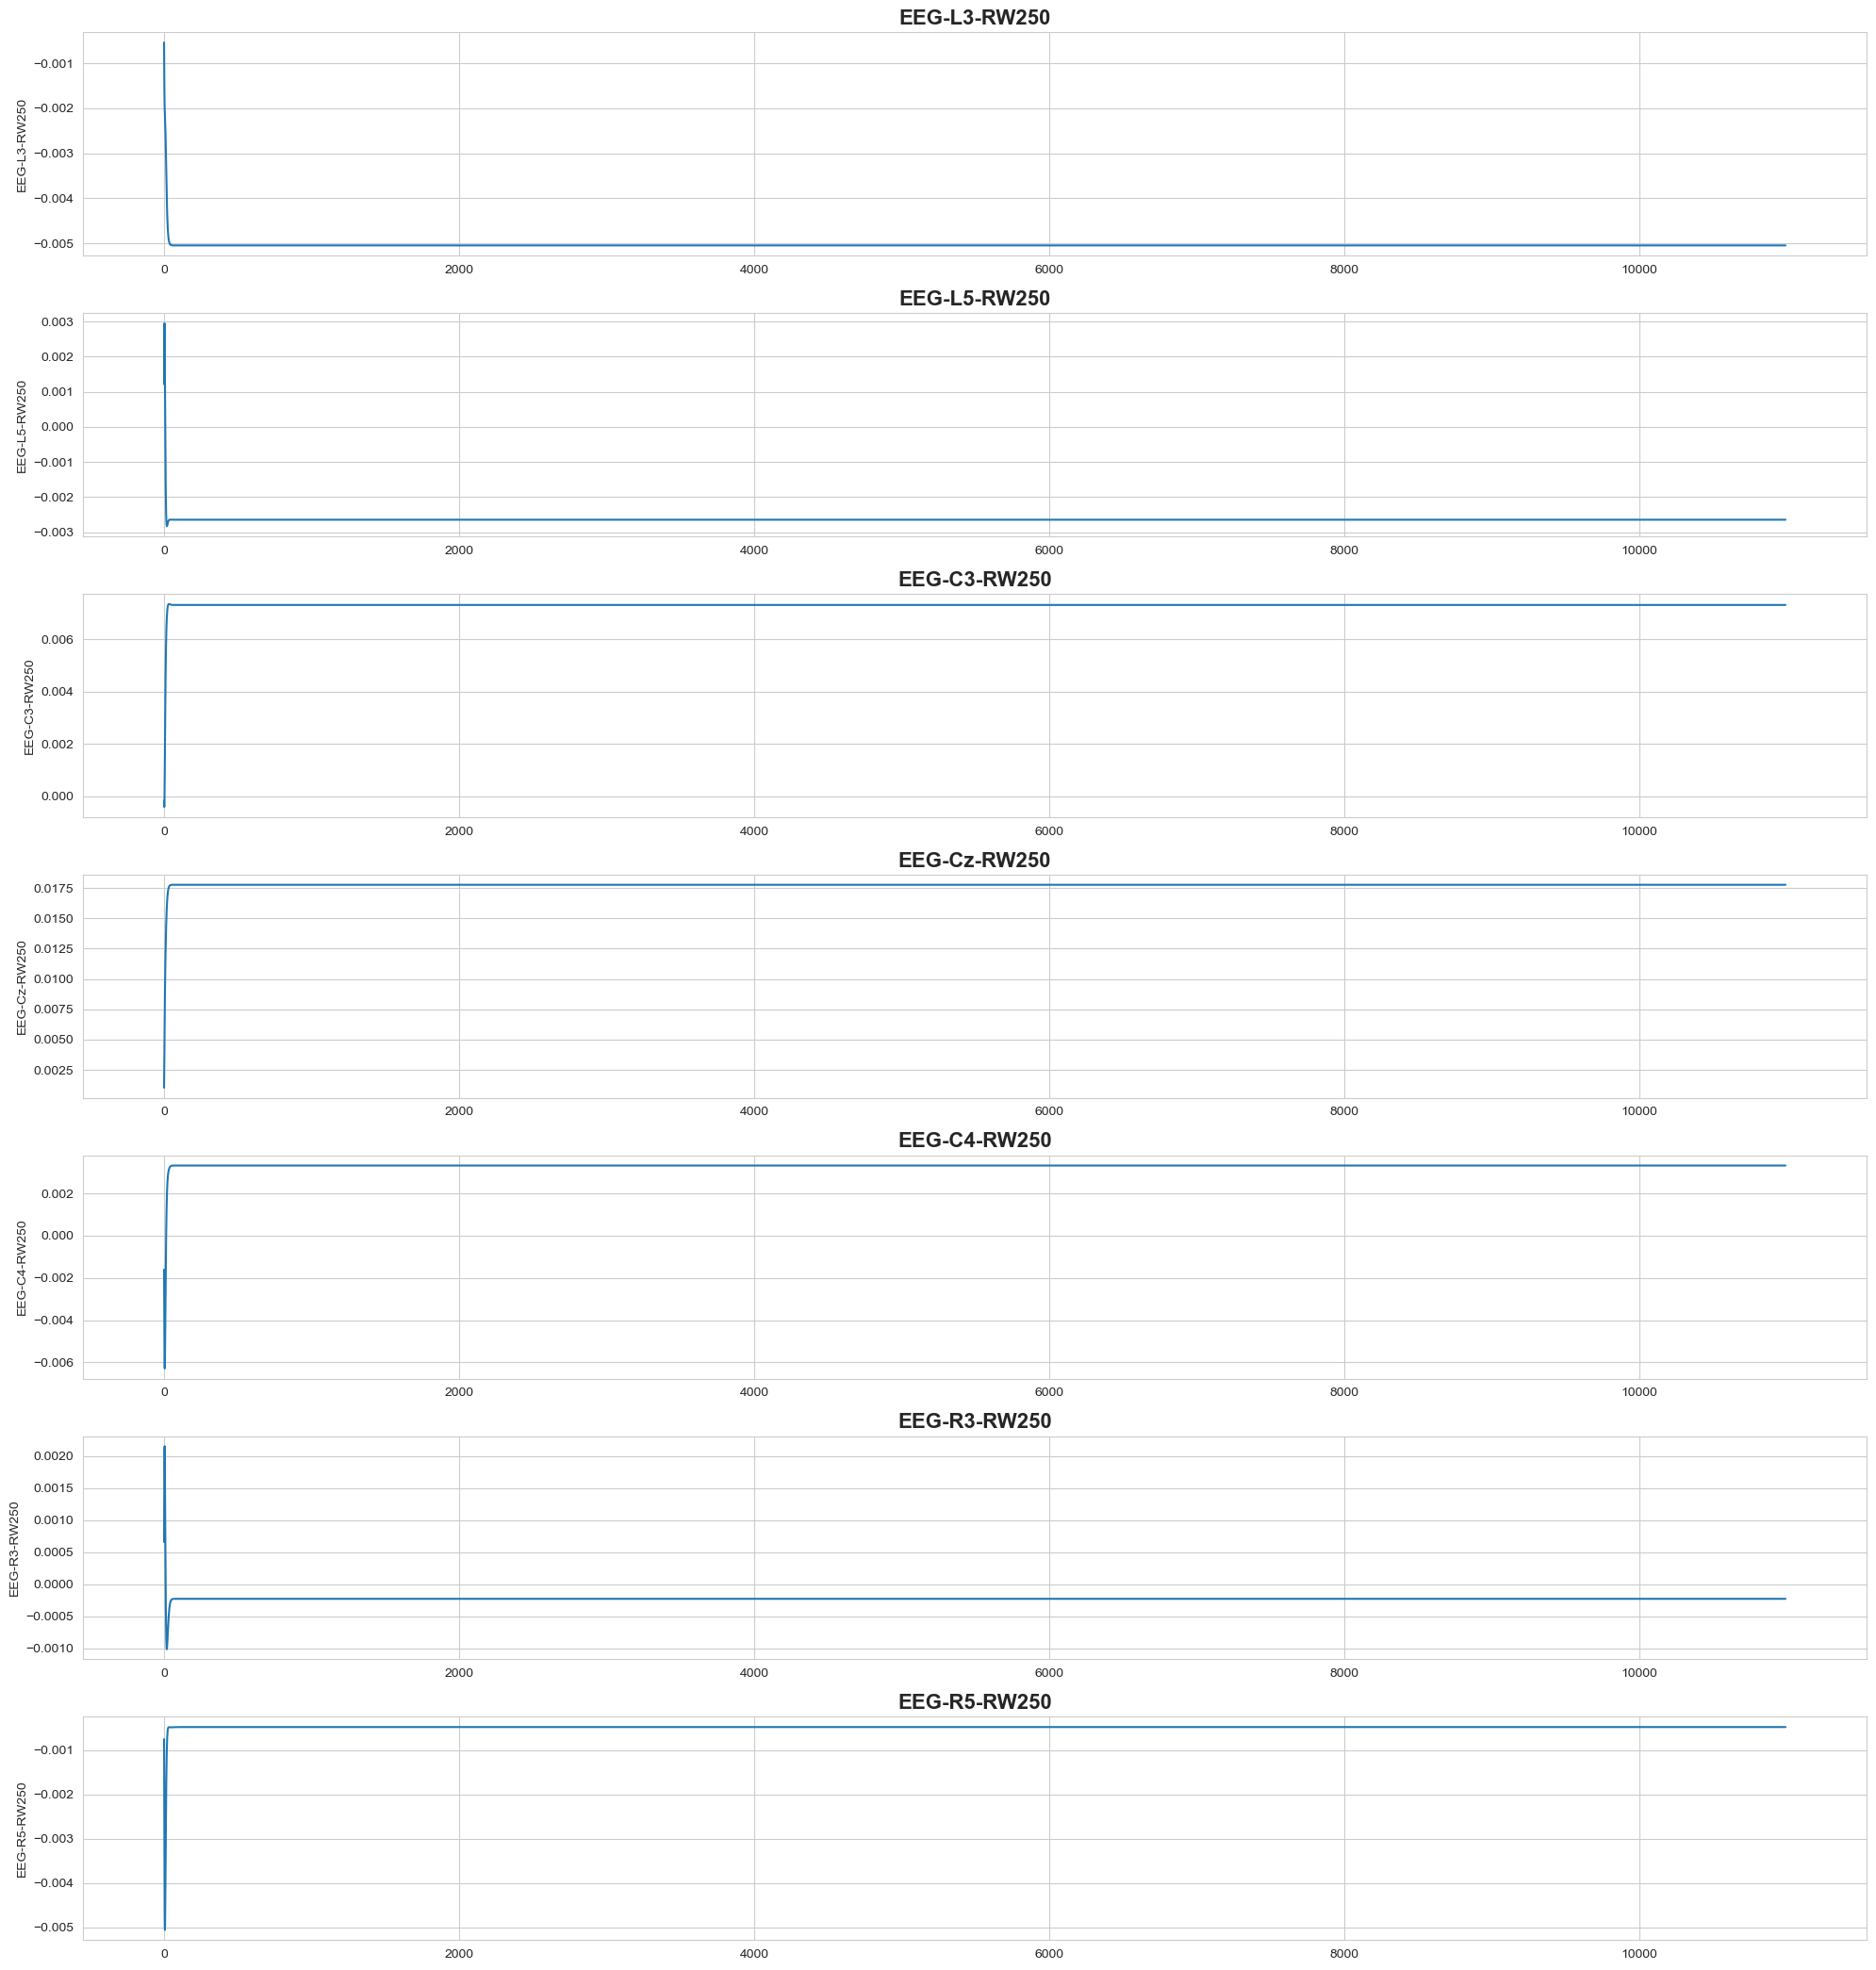

In [15]:
def plot_all_time_series(df: pd.DataFrame) -> None:
    """ Plots all Time Series (all float64 columns) in the provided DataFrame

    :param df: pd.DataFrame -- Input DataFrame
    :param time_col: str -- Name of the time column
    :return: None
    """
    cols = [x for x in list(df.columns) if x.endswith(f"RW{250}")]

    fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(20, len(cols)*3))
    for col, ax in zip(cols, axes.flatten()):
        sns.lineplot(data=df, x=df.index, y=col, ax=ax)
        ax.set_title(col, fontweight="bold", size=16)
    fig.tight_layout()

plot_all_time_series(test_df)